# LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as wnp
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
df.corr()['price']

C:\Users\Trivesh Kamboj\AppData\Local\Temp\ipykernel_17296\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [14]:
df=df.drop(['date','id','condition','yr_built','zipcode','long'],axis=1)

In [15]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,0,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1991,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,0,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,0,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,0,47.6168,1800,7503


In [59]:
X=df.drop('price',axis=1).values
y=df['price'].values

In [60]:
X.shape

(21597, 14)

In [61]:
y.shape

(21597,)

In [62]:
import sklearn
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

In [89]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [90]:
pred=model.predict(X_test)

In [91]:
pred=pd.Series(pred).values

In [92]:
pred.shape

(5400,)

In [93]:
y_test.shape

(5400,)

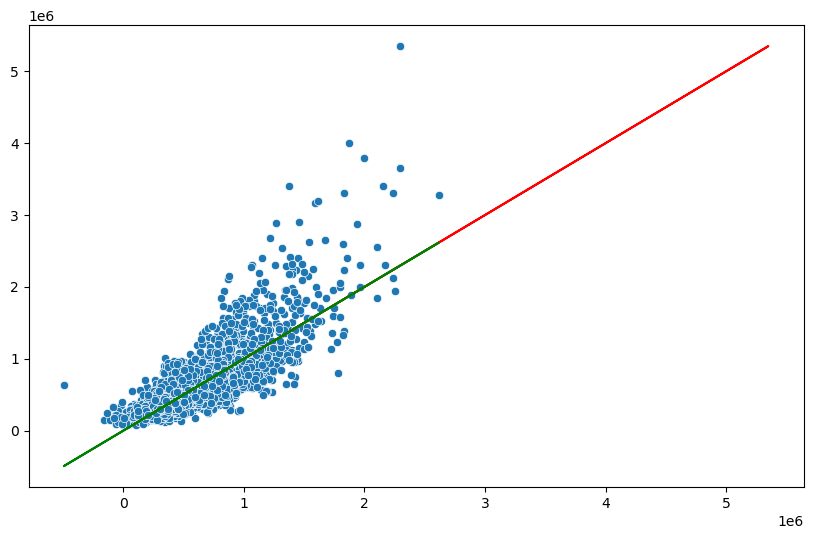

In [137]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.scatterplot(x=pred,y=y_test)
plt.plot(y_test,y_test,'r')
plt.plot(pred,pred,'g')

In [100]:
model.score(X_train,y_train)

0.6633679269349269

In [102]:
model.score(X_test,y_test)

0.6603792278486131

### Checking the K fold cross validation score :

In [103]:
from sklearn.model_selection import cross_val_score

In [108]:
c_s=cross_val_score(LinearRegression(),X,y,cv=5)

In [109]:
import numpy as np
np.mean(c_s)

0.6590846131951595

### Using Ensamble learning to improve the scores of prediction :

In [128]:
from sklearn.ensemble import BaggingRegressor
bag_model=BaggingRegressor(
    base_estimator=LinearRegression(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=30
)

In [129]:
bag_model.fit(X_train,y_train)

C:\Users\Trivesh Kamboj\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=LinearRegression(), max_samples=0.8,
                 n_estimators=100, oob_score=True, random_state=30)

In [130]:
bag_model.score(X_test,y_test)

0.6606630126548841

In [131]:
0.6606630126548841>0.6590846131951595

True

In [132]:
0.6606630126548841/0.6603792278486131

1.0004297300616125

In [134]:
pred=bag_model.predict(X_test)

In [136]:
y_test

array([1500000.,  325000., 1160000., ...,  539950.,  699999.,  275000.])